In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

In [5]:
sales = pd.read_excel(r'sales.xlsx')
sales

,CustomerID,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
0,11054,2021-03-18 00:00:00,85.0,7230.0,1820,3435.0,1600.0,440.0,57.0,1,13,4,13,6,0
1,17117,2021-03-01 00:00:00,96.0,5850.0,320,2745.0,500.0,320.0,8.0,3,9,7,9,6,0
2,31751,2021-11-01 00:00:00,7.0,8380.0,0,1560.0,0.0,0.0,28.0,3,9,5,3,9,0
3,12947,2022-05-19 00:00:00,54.0,5090.0,280,2355.0,140.0,560.0,78.0,3,7,5,11,3,0
4,11402,2021-01-01 00:00:00,64.0,330.0,0,240.0,0.0,0.0,7.0,2,4,1,3,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,23699,2021-11-27 00:00:00,54.0,290.0,20,180.0,0.0,40.0,4.0,2,4,1,4,7,0
7004,23255,2021-03-25 00:00:00,27.0,230.0,80,525.0,20.0,80.0,23.0,3,5,1,3,8,0
7005,5798,2022-04-12 00:00:00,36.0,3050.0,2460,3840.0,1800.0,980.0,107.0,1,8,4,13,4,0
7006,16577,2020-09-01 00:00:00,49.0,20.0,200,90.0,160.0,0.0,14.0,1,3,2,2,8,1


In [6]:
sales.set_index ('CustomerID', inplace = True)

In [7]:
#check for duplicates 
sales [sales.duplicated()]

,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
CustomerID,,,,,,,,,,,,,,
26891,2022-03-21 00:00:00,13.0,610.0,320,915.0,20.0,240.0,78.0,2,6,3,2,6,0
17069,2020-11-24 00:00:00,32.0,1320.0,280,390.0,180.0,100.0,28.0,5,7,2,3,8,0
28844,2022-06-29 00:00:00,43.0,6050.0,140,1275.0,140.0,140.0,7.0,1,10,3,10,4,0
28688,2020-12-29 00:00:00,43.0,5940.0,120,570.0,120.0,120.0,25.0,4,9,3,10,7,0
5627,2022-04-28 00:00:00,31.0,130.0,0,120.0,20.0,20.0,5.0,1,3,1,4,3,0
15905,2020-09-04 00:00:00,3.0,8900.0,1260,4380.0,0.0,500.0,12.0,4,10,5,7,6,0
20747,2020-08-14 00:00:00,63.0,2540.0,1420,6705.0,2020.0,2840.0,20.0,1,5,5,8,1,0
28625,2021-12-25 00:00:00,35.0,60.0,120,120.0,180.0,180.0,18.0,3,4,2,3,6,0


In [8]:
sales.drop_duplicates(inplace= True)

In [9]:
#Basic exploration 

In [10]:
sales.shape

(7000, 14)

In [11]:
sales.columns

Index(['Date_Adherence', 'Recency', 'MntMeat&Fish', 'MntEntries',
       'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts',
       'MntAdditionalRequests', 'NumOfferPurchases', 'NumAppPurchases',
       'NumTakeAwayPurchases', 'NumStorePurchases', 'NumAppVisitsMonth',
       'Complain'],
      dtype='object')

In [12]:
sales.head(5)

,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
CustomerID,,,,,,,,,,,,,,
11054,2021-03-18 00:00:00,85.0,7230.0,1820,3435.0,1600.0,440.0,57.0,1,13,4,13,6,0
17117,2021-03-01 00:00:00,96.0,5850.0,320,2745.0,500.0,320.0,8.0,3,9,7,9,6,0
31751,2021-11-01 00:00:00,7.0,8380.0,0,1560.0,0.0,0.0,28.0,3,9,5,3,9,0
12947,2022-05-19 00:00:00,54.0,5090.0,280,2355.0,140.0,560.0,78.0,3,7,5,11,3,0
11402,2021-01-01 00:00:00,64.0,330.0,0,240.0,0.0,0.0,7.0,2,4,1,3,8,0


In [13]:
sales.tail(5)

,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
CustomerID,,,,,,,,,,,,,,
23699,2021-11-27 00:00:00,54.0,290.0,20,180.0,0.0,40.0,4.0,2,4,1,4,7,0
23255,2021-03-25 00:00:00,27.0,230.0,80,525.0,20.0,80.0,23.0,3,5,1,3,8,0
5798,2022-04-12 00:00:00,36.0,3050.0,2460,3840.0,1800.0,980.0,107.0,1,8,4,13,4,0
16577,2020-09-01 00:00:00,49.0,20.0,200,90.0,160.0,0.0,14.0,1,3,2,2,8,1
25310,2020-12-05 00:00:00,74.0,160.0,100,180.0,680.0,80.0,13.0,3,3,2,4,4,0


In [14]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 11054 to 25310
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date_Adherence         7000 non-null   object 
 1   Recency                6977 non-null   float64
 2   MntMeat&Fish           7000 non-null   float64
 3   MntEntries             7000 non-null   int64  
 4   MntVegan&Vegetarian    7000 non-null   float64
 5   MntDrinks              6972 non-null   float64
 6   MntDesserts            7000 non-null   float64
 7   MntAdditionalRequests  7000 non-null   float64
 8   NumOfferPurchases      7000 non-null   int64  
 9   NumAppPurchases        7000 non-null   int64  
 10  NumTakeAwayPurchases   7000 non-null   int64  
 11  NumStorePurchases      7000 non-null   int64  
 12  NumAppVisitsMonth      7000 non-null   int64  
 13  Complain               7000 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 82

we have:
 - 6 float variables 
 - 8 integer variables 
 - 1 object variable 

In [15]:
sales.describe()

,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
count,6977.000000,7000.000000,7000.000000,7000.000000,6972.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,49.235058,3079.523800,534.749429,2785.050786,545.657544,540.656029,42.556186,2.448429,6.015714,3.834571,5.790571,5.278286,0.010286
std,28.922688,3370.377166,787.846684,3908.718244,805.149088,802.221866,49.650747,2.306968,2.745537,3.331142,3.295708,2.748596,0.100903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,250.000000,40.000000,240.000000,40.000000,40.000000,9.000000,1.000000,4.000000,1.000000,3.000000,3.000000,0.000000
50%,49.000000,1820.000000,180.000000,1110.000000,180.000000,180.000000,24.000000,2.000000,6.000000,3.000000,5.000000,5.000000,0.000000
75%,74.000000,5070.000000,680.000000,3795.000000,700.000000,680.000000,57.000000,3.000000,8.000000,5.000000,8.000000,7.000000,0.000000
max,99.000000,14980.000000,3980.000000,25974.000000,3980.000000,3980.000000,249.000000,16.000000,13.000000,24.000000,13.000000,20.000000,1.000000


- `count` we can see that the variable 'Recency' and 'MntDrinks' don't have the 7008 rows filled, this means we have a problem with NA's.
- relação estreita entre Drinks, desserts and entries 


In [16]:
sales.loc[sales[['Recency']].idxmax()] # inspect the max value 99, it could have been coded to not have NA 

,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
CustomerID,,,,,,,,,,,,,,
30641,2022-06-27 00:00:00,99.0,4530.0,760,4185.0,2880.0,760.0,183.0,2,9,8,10,3,0


In [17]:
sales.loc[sales[['MntEntries']].idxmax()]

,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
CustomerID,,,,,,,,,,,,,,
15023,2021-07-23 00:00:00,82.0,3830.0,3980,11730.0,920.0,2440.0,30.0,1,7,3,6,3,0


In [18]:
sales.loc[sales[['MntDrinks']].idxmax()]

,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
CustomerID,,,,,,,,,,,,,,
25541,2020-09-10 00:00:00,6.0,3410.0,2840,1695.0,3980.0,3020.0,66.0,3,8,7,12,5,0


In [19]:
sales.skew()

/var/folders/zn/8cnznvyn0zv0vsffcz5h85tc0000gn/T/ipykernel_6903/2054996692.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sales.skew()


Recency                  0.017676
MntMeat&Fish             1.148862
MntEntries               2.087220
MntVegan&Vegetarian      2.486897
MntDrinks                2.046308
MntDesserts              2.057811
MntAdditionalRequests    1.826522
NumOfferPurchases        2.860514
NumAppPurchases          0.525873
NumTakeAwayPurchases     2.254158
NumStorePurchases        0.623254
NumAppVisitsMonth        1.005192
Complain                 9.709429
dtype: float64

- `Moderate skewness` : NumAppPurchases  and NumStorePurchases
- `High skewness` : MntMeat&Fish, MntEntries, MntVegan&Vegetarian,MntDrinks,MntDesserts, MntAdditionalRequests, NumOfferPurchases, NumTakeAwayPurchases, NumAppVisitsMonth and   Complain 

In [20]:
sales.kurt()

/var/folders/zn/8cnznvyn0zv0vsffcz5h85tc0000gn/T/ipykernel_6903/431772963.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sales.kurt()


Recency                  -1.197978
MntMeat&Fish              0.532098
MntEntries                4.096167
MntVegan&Vegetarian       8.431538
MntDrinks                 3.839256
MntDesserts               3.813464
MntAdditionalRequests     3.084190
NumOfferPurchases        10.997946
NumAppPurchases          -0.222899
NumTakeAwayPurchases      8.582138
NumStorePurchases        -0.694327
NumAppVisitsMonth         4.992870
Complain                 92.299387
dtype: float64

- `high Kurtosis (>3): `
MntEntries                
MntVegan&Vegetarian      
MntDrinks                 
MntDesserts               
MntAdditionalRequests    
NumOfferPurchases 
NumTakeAwayPurchases
NumAppVisitsMonth         
Complain                 

VISUAL EXPLO

In [21]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'NumAppVisitsMonth')

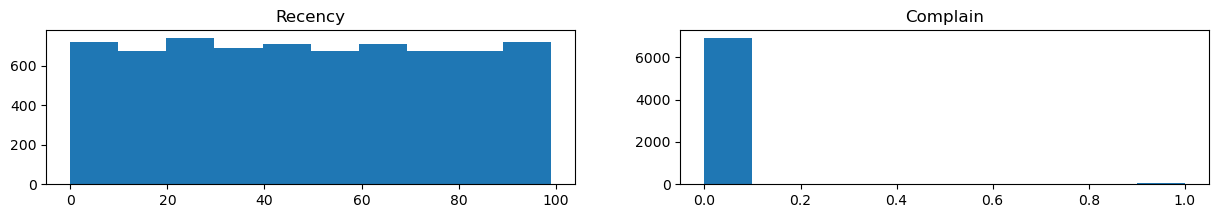

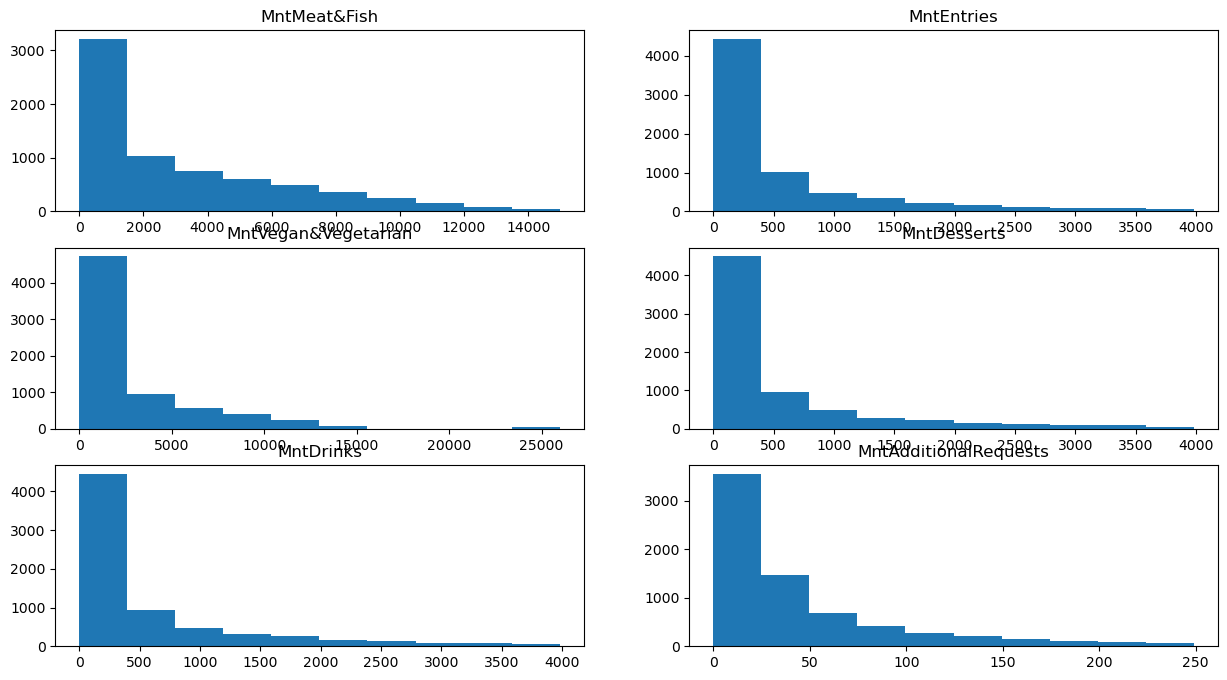

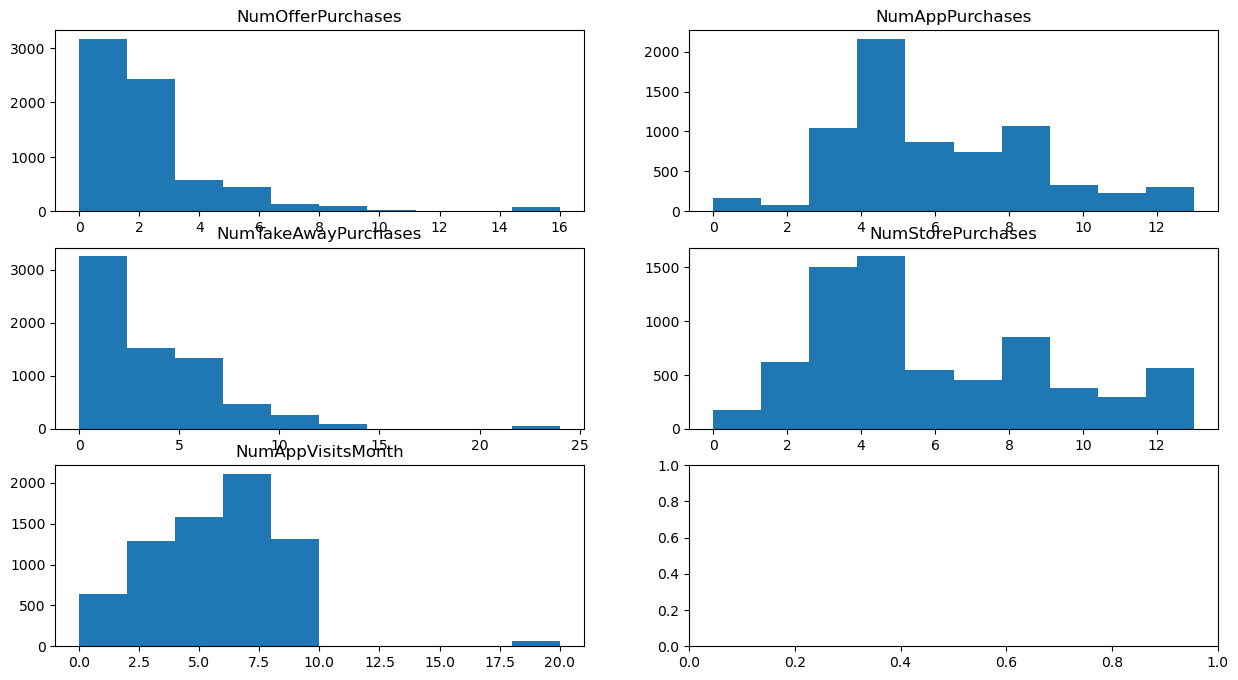

In [22]:
fig, [ax6,ax7] = plt.subplots(nrows=1, ncols = 2, figsize=(15,2)) 
ax6.hist(sales['Recency'])
ax7.hist(sales['Complain'])

fig, [[ax0,ax1],[ax2,ax3],[ax4,ax5]] = plt.subplots(nrows=3, ncols = 2, figsize=(15,8)) 
ax0.hist(sales['MntMeat&Fish'])
ax1.hist(sales['MntEntries'])
ax2.hist(sales['MntVegan&Vegetarian'])
ax3.hist(sales['MntDesserts'])
ax4.hist(sales['MntDrinks'])
ax5.hist(sales['MntAdditionalRequests'])

fig, [[ax8,ax9],[ax10,ax11],[ax12,ax13]] = plt.subplots(nrows=3, ncols = 2, figsize=(15,8))
ax8.hist(sales['NumOfferPurchases'])            
ax9.hist(sales['NumAppPurchases'])          
ax10.hist(sales['NumTakeAwayPurchases'])   
ax11.hist(sales['NumStorePurchases'])        
ax12.hist(sales['NumAppVisitsMonth'])   

#TITULOS E LABELS
ax6.set_title ('Recency')
ax7.set_title ('Complain')
ax0.set_title('MntMeat&Fish')
ax1.set_title('MntEntries')
ax2.set_title('MntVegan&Vegetarian')
ax3.set_title('MntDesserts')
ax4.set_title('MntDrinks')
ax5.set_title('MntAdditionalRequests')
ax8.set_title('NumOfferPurchases')            
ax9.set_title('NumAppPurchases')          
ax10.set_title('NumTakeAwayPurchases')   
ax11.set_title('NumStorePurchases')        
ax12.set_title('NumAppVisitsMonth')


#TITULOS E LABELS
#ax2.plot(covid_data['new_cases'])
#ax2.set_title('Number of Cases (Daily) )')
#ax2.set_xlabel('Date')
#ax2.set_ylabel('Number of Cases')

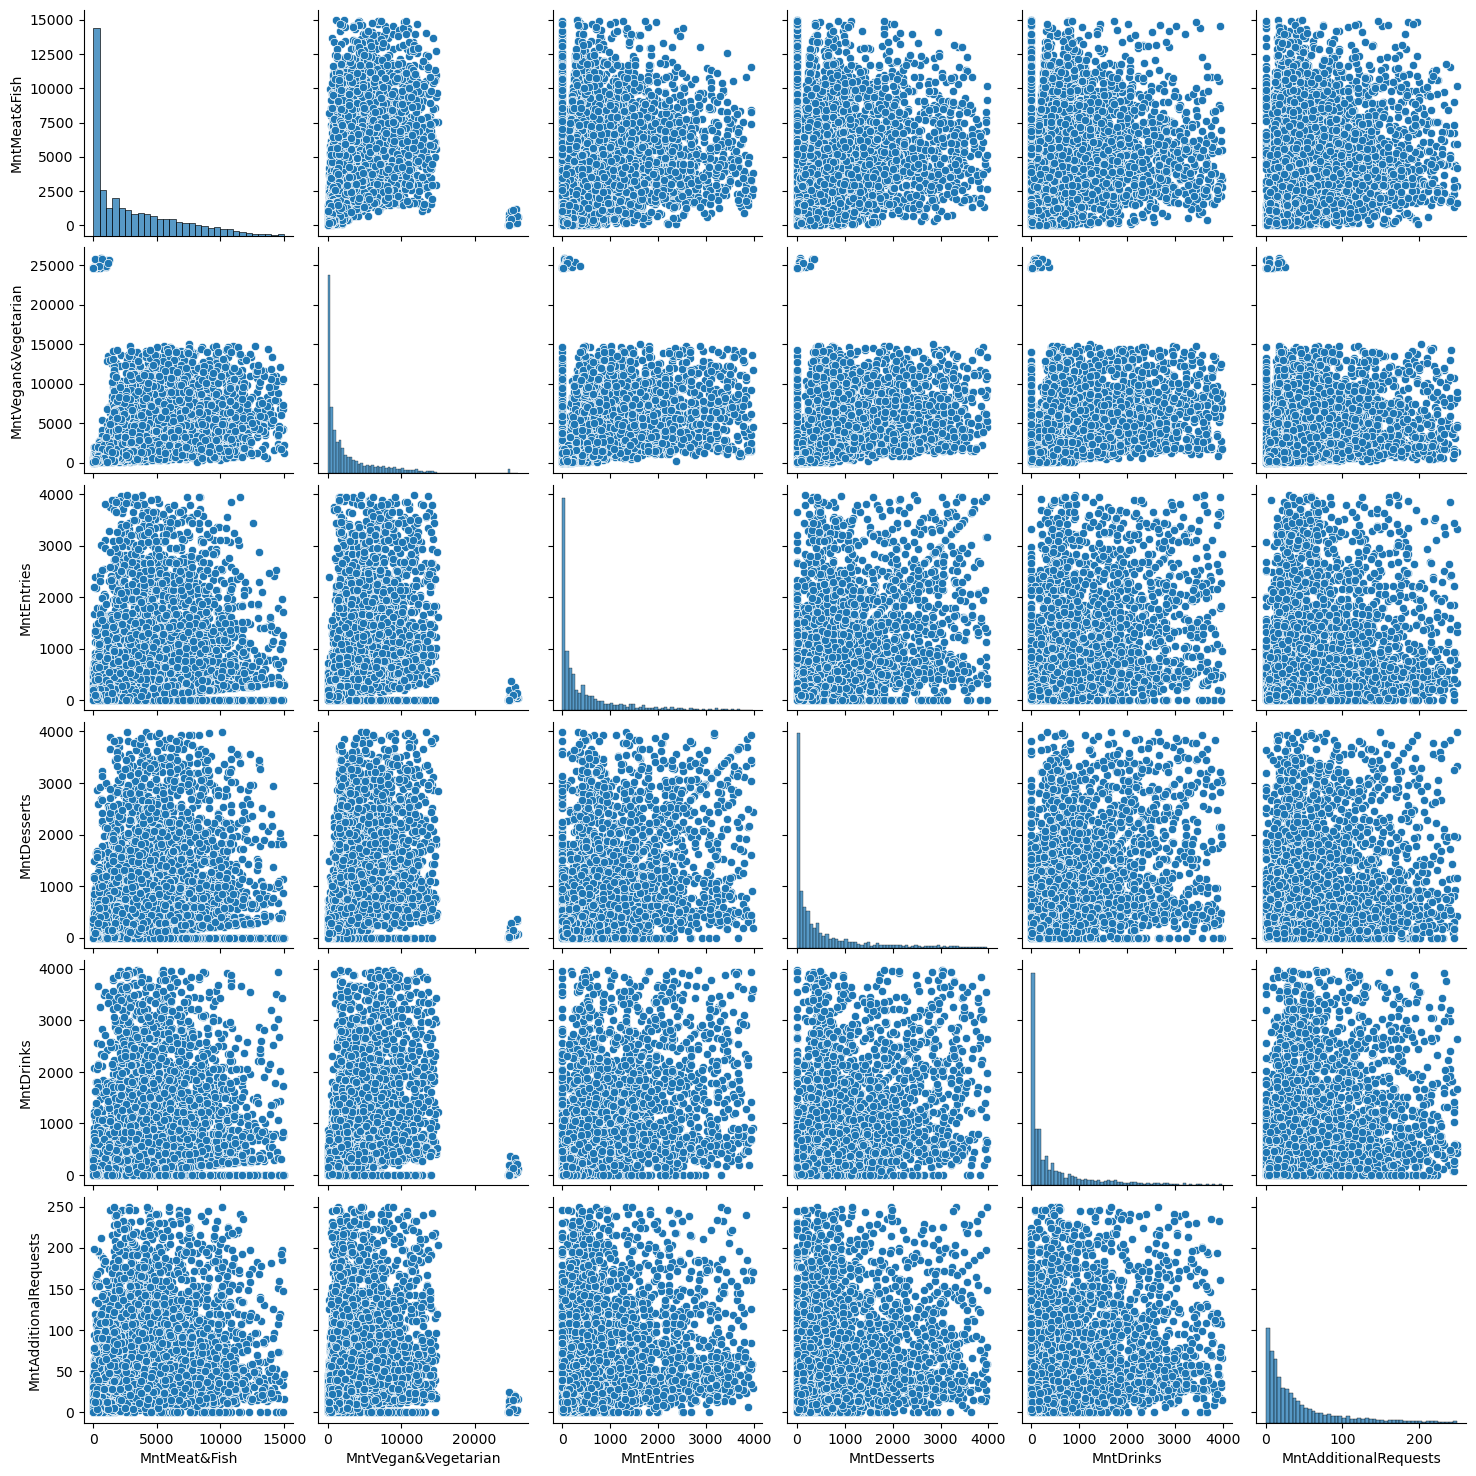

In [23]:
######################################################
######Fazer análise pairing com "teoria" por trás ####

sales_subset = sales[['MntMeat&Fish','MntVegan&Vegetarian','MntEntries','MntDesserts','MntDrinks','MntAdditionalRequests']].copy()
sns.pairplot(sales_subset)



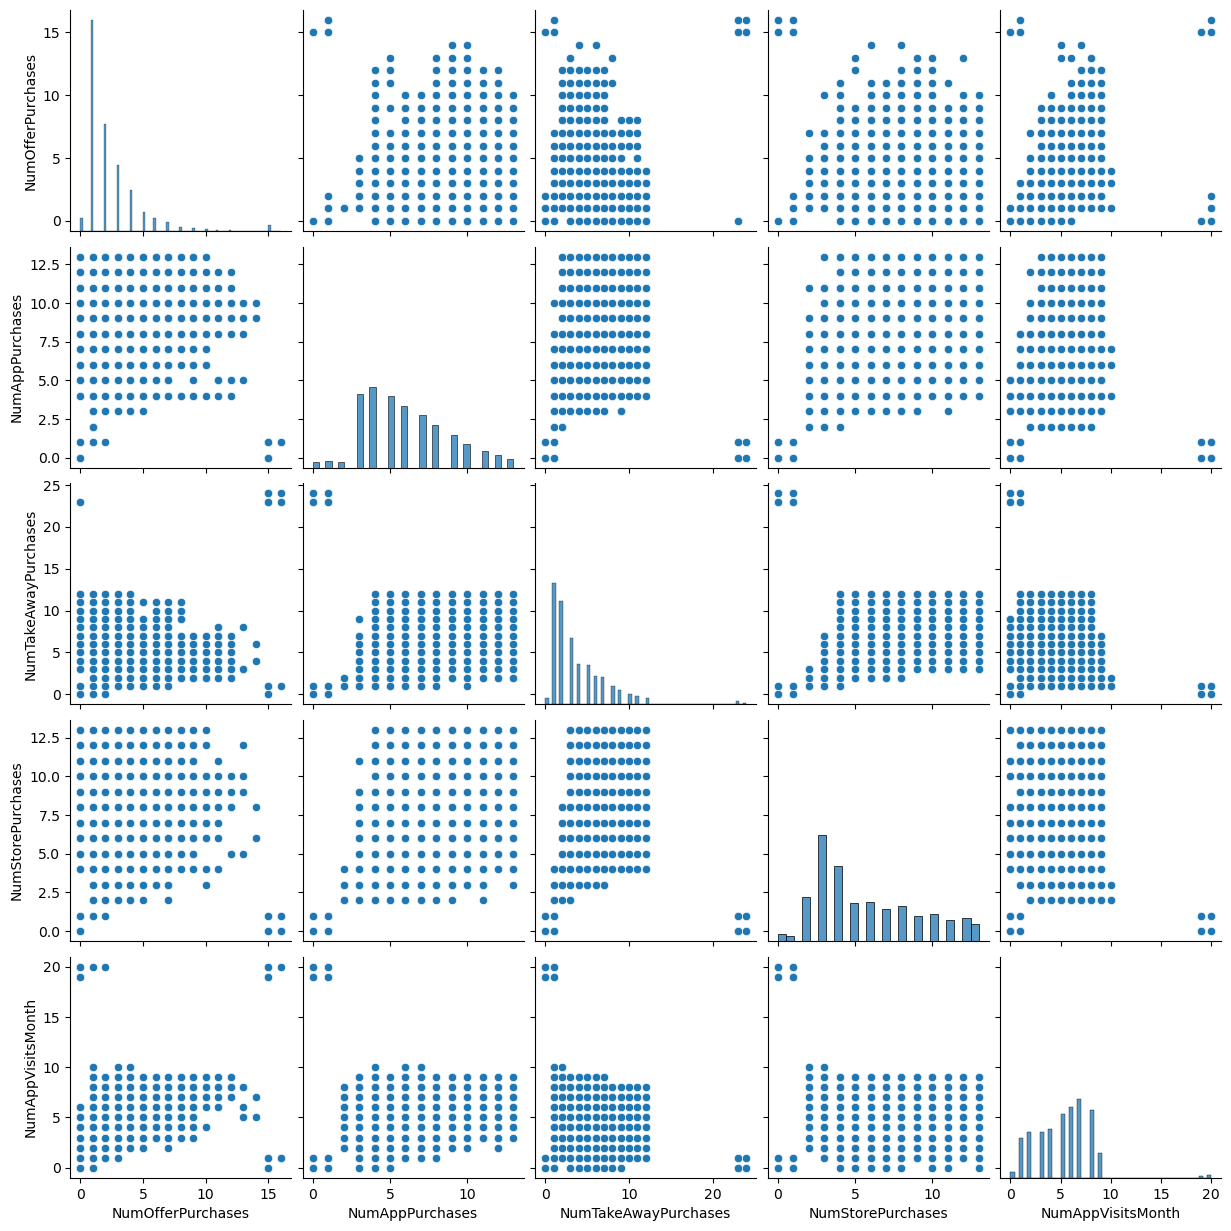

In [24]:
sales_subset1 = sales[['NumOfferPurchases','NumAppPurchases','NumTakeAwayPurchases','NumStorePurchases','NumAppVisitsMonth']].copy()
sns.pairplot(sales_subset1)

<AxesSubplot:>

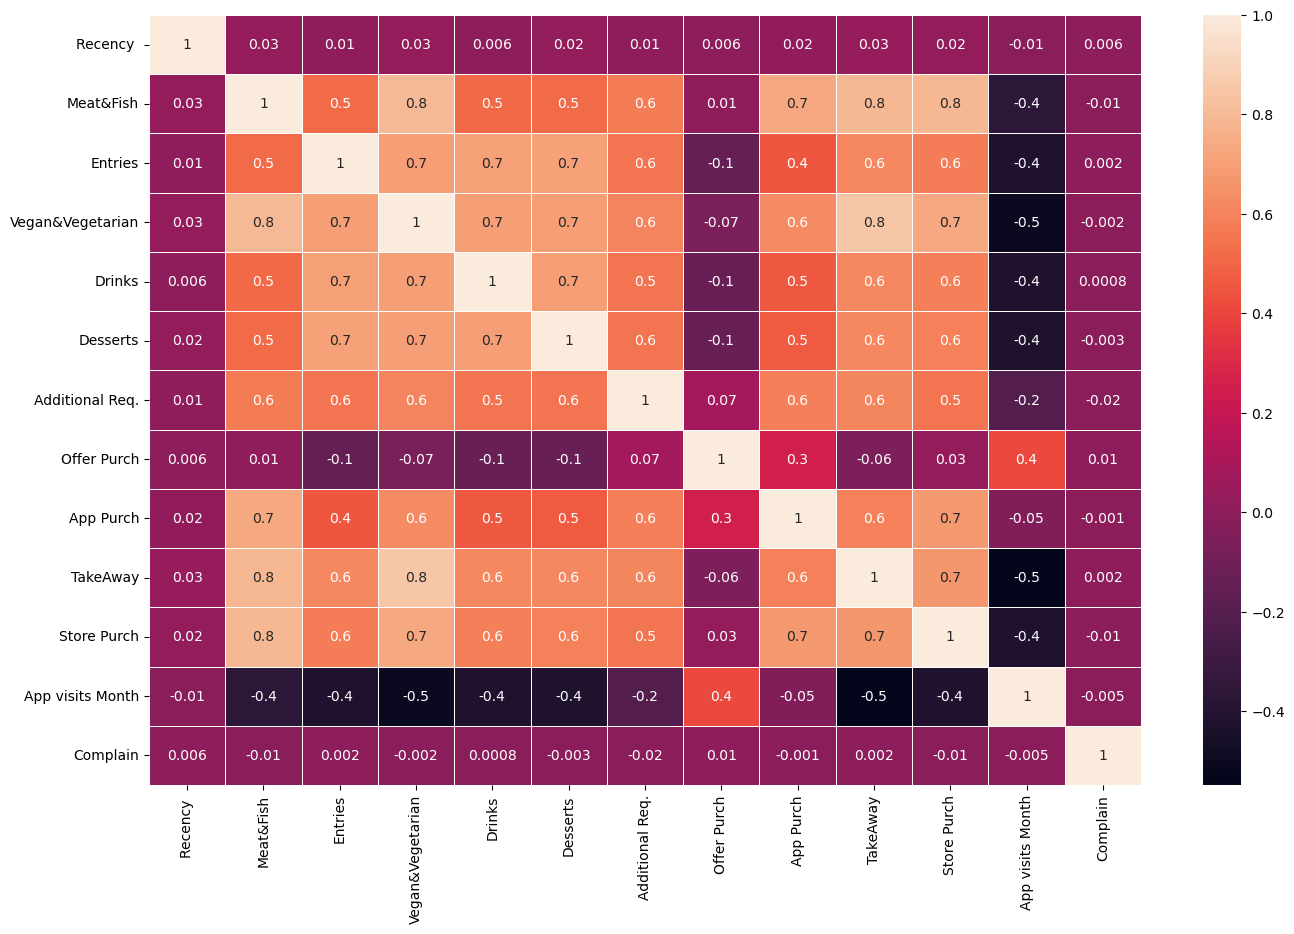

In [25]:
sales_corr = sales.corr(method = 'spearman')
figure = plt.figure(figsize=(16,10))


x_axis_labels = ['Recency ', 'Meat&Fish', 'Entries', 'Vegan&Vegetarian', 'Drinks', 'Desserts', 'Additional Req.',
                'Offer Purch','App Purch',  'TakeAway', 'Store Purch', 'App visits Month', 'Complain'] # labels for x-axis
y_axis_labels = ['Recency ', 'Meat&Fish', 'Entries', 'Vegan&Vegetarian', 'Drinks', 'Desserts', 'Additional Req.',
                'Offer Purch','App Purch',  'TakeAway', 'Store Purch', 'App visits Month', 'Complain'] # labels for y-axis

sns.heatmap(sales_corr, annot=True, fmt = '.1g', 
            xticklabels=x_axis_labels,yticklabels=y_axis_labels,
           linewidth=0.5)

##Correlation coefficients whose magnitude are between 0.9 and 1.0 indicate variables which 
##can be considered very highly correlated. Correlation coefficients whose magnitude are between 0.7 and 0.9 
##indicate variables which can be considered highly correlated. Correlation coefficients whose
##magnitude are between 0.5 and 0.7 indicate variables which can be considered moderately correlated.
##Correlation coefficients whose magnitude are between 0.3 and 0.5 indicate variables which have a low correlation.

-  `Recency:` has a low correlation with all of the variables 
- `Offer Purchases:` has a low correlation with all of the variables 
- `Complain:`has a low correlation with all of the variables 
- the rest of the variables atre all moderately correlated between each other. 

DATA Cleaning 
  
  -Outliers


{'whiskers': [<matplotlib.lines.Line2D at 0x7fb780485ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb780492280>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb7804859d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb780492820>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb780492af0>],
 'means': []}

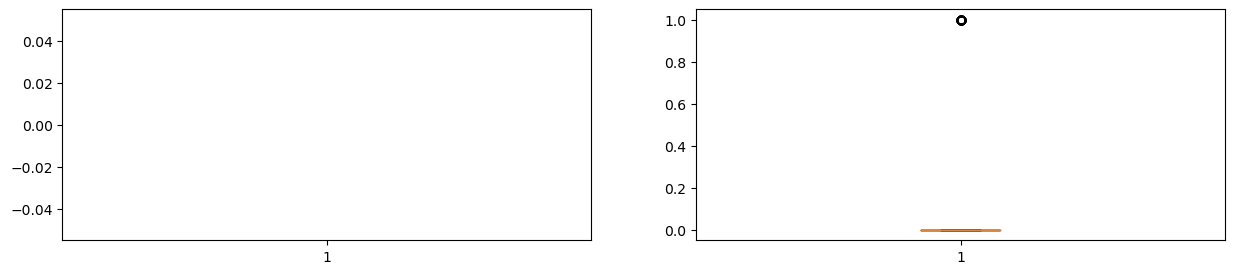

In [26]:
fig, [ax6,ax7] = plt.subplots(nrows=1, ncols = 2, figsize=(15,3)) 
ax6.boxplot(sales['Recency'])
ax7.boxplot(sales['Complain'])

Text(0.5, 1.0, 'NumAppVisitsMonth')

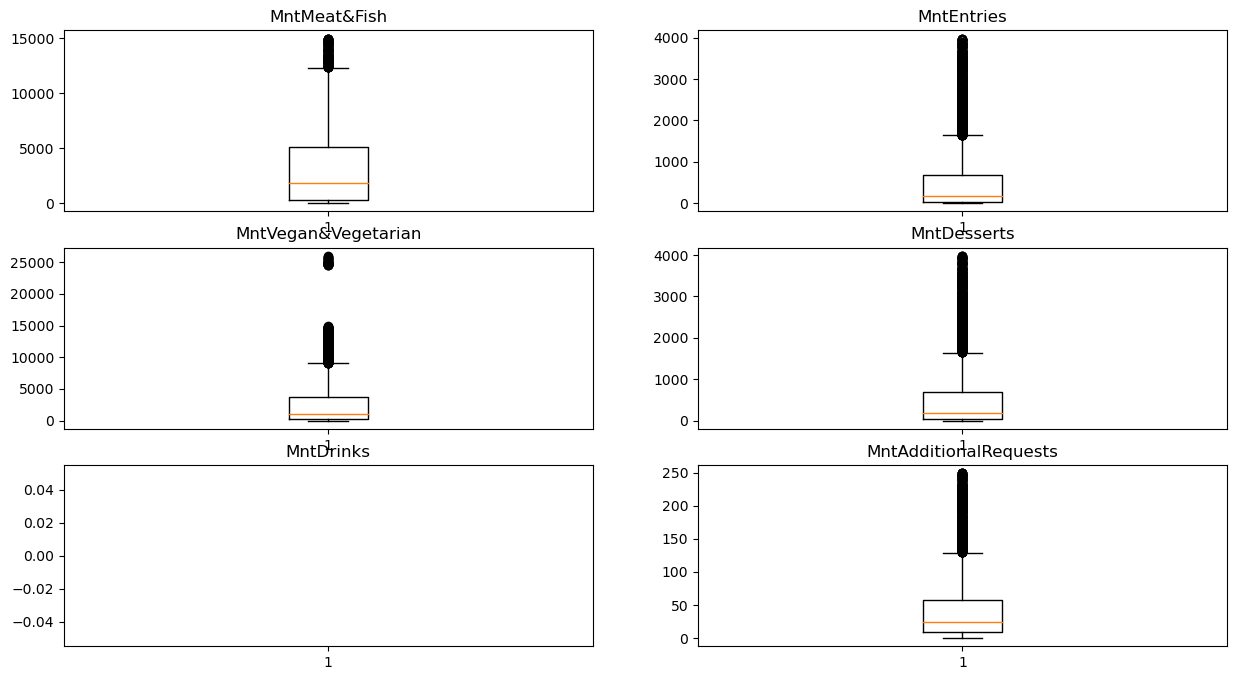

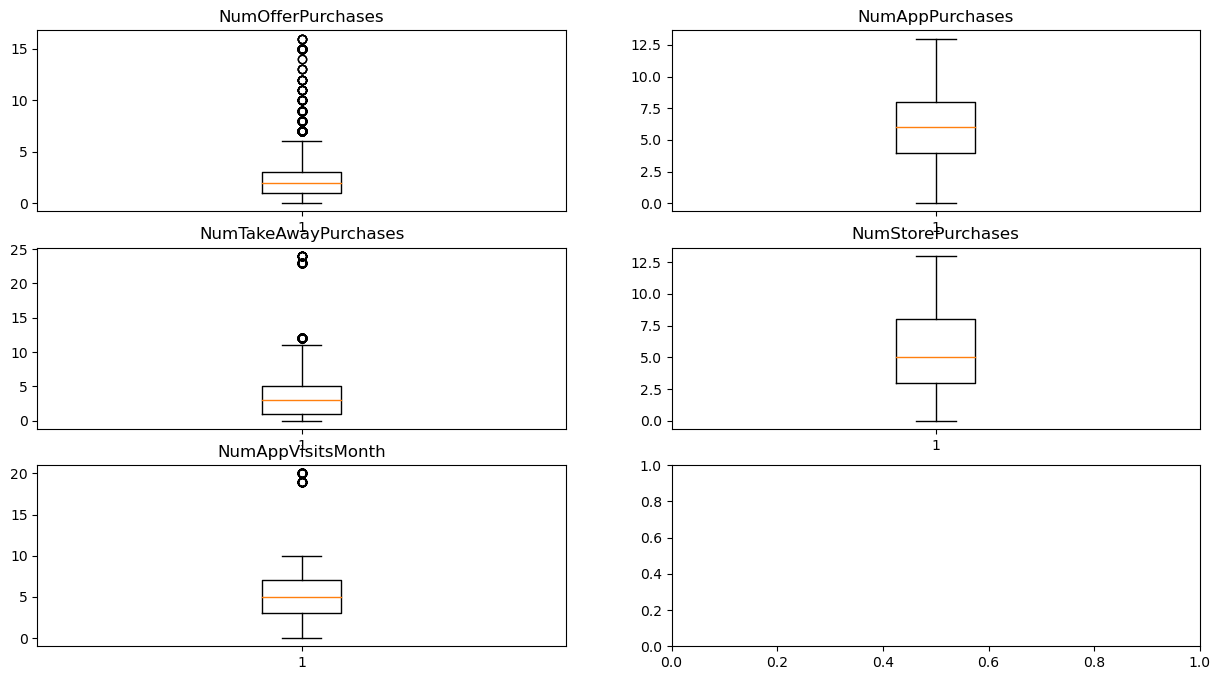

In [27]:
fig, [[ax0,ax1],[ax2,ax3],[ax4,ax5]] = plt.subplots(nrows=3, ncols = 2, figsize=(15,8)) 
ax0.boxplot(sales['MntMeat&Fish'])
ax1.boxplot(sales['MntEntries'])
ax2.boxplot(sales['MntVegan&Vegetarian'])
ax3.boxplot(sales['MntDesserts'])
ax4.boxplot(sales['MntDrinks'])
ax5.boxplot(sales['MntAdditionalRequests'])

fig, [[ax8,ax9],[ax10,ax11],[ax12,ax13]] = plt.subplots(nrows=3, ncols = 2, figsize=(15,8))
ax8.boxplot(sales['NumOfferPurchases'])            
ax9.boxplot(sales['NumAppPurchases'])          
ax10.boxplot(sales['NumTakeAwayPurchases'])   
ax11.boxplot(sales['NumStorePurchases'])        
ax12.boxplot(sales['NumAppVisitsMonth']) 


#TITULOS E LABELS
#ax13.set_title ('Recency')
#ax7.set_title ('Complain')
ax0.set_title('MntMeat&Fish')
ax1.set_title('MntEntries')
ax2.set_title('MntVegan&Vegetarian')
ax3.set_title('MntDesserts')
ax4.set_title('MntDrinks')
ax5.set_title('MntAdditionalRequests')
ax8.set_title('NumOfferPurchases')            
ax9.set_title('NumAppPurchases')          
ax10.set_title('NumTakeAwayPurchases')   
ax11.set_title('NumStorePurchases')        
ax12.set_title('NumAppVisitsMonth')

In [28]:
sales_3std = 3 *(sales.std().round(2))
sales_3std


/var/folders/zn/8cnznvyn0zv0vsffcz5h85tc0000gn/T/ipykernel_6903/1822166211.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sales_3std = 3 *(sales.std().round(2))


Recency                     86.76
MntMeat&Fish             10111.14
MntEntries                2363.55
MntVegan&Vegetarian      11726.16
MntDrinks                 2415.45
MntDesserts               2406.66
MntAdditionalRequests      148.95
NumOfferPurchases            6.93
NumAppPurchases              8.25
NumTakeAwayPurchases         9.99
NumStorePurchases            9.90
NumAppVisitsMonth            8.25
Complain                     0.30
dtype: float64

In [29]:
#check if there is negative values in the variables 
(sales [['Recency','Complain','MntMeat&Fish','MntEntries','MntVegan&Vegetarian',
      'MntDesserts','MntDrinks', 'MntAdditionalRequests','NumOfferPurchases','NumAppPurchases','NumTakeAwayPurchases',
      'NumStorePurchases', 'NumAppVisitsMonth']] < 0).sum()



Recency                  0
Complain                 0
MntMeat&Fish             0
MntEntries               0
MntVegan&Vegetarian      0
MntDesserts              0
MntDrinks                0
MntAdditionalRequests    0
NumOfferPurchases        0
NumAppPurchases          0
NumTakeAwayPurchases     0
NumStorePurchases        0
NumAppVisitsMonth        0
dtype: int64

In [86]:
subset_data=sales[sales["Recency"]>sales_3std['Recency']]
subset_data
#we have 915 outliers 

,CustomerID,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
1,17117,2021-03-01 00:00:00,96.0,5850.0,320,2745.0,500.0,320.0,8.0,3,9,7,9,6,0
11,29627,2020-08-11 00:00:00,94.0,1790.0,608,12615.0,2860.0,680.0,35.0,5,7,6,7,4,0
23,25640,2021-01-28 00:00:00,95.0,250.0,40,315.0,40.0,60.0,16.0,2,4,1,3,7,0
35,25001,2022-06-15 00:00:00,96.0,5390.0,1780,12120.0,3940.0,3220.0,17.0,1,9,7,4,2,0
52,7235,2021-05-11 00:00:00,96.0,80.0,40,225.0,0.0,200.0,18.0,4,5,2,3,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6976,6827,2021-09-21 00:00:00,99.0,13980.0,1440,11925.0,0.0,2400.0,24.0,1,6,9,5,1,0
6977,24851,2020-09-10 00:00:00,94.0,730.0,1560,570.0,200.0,1000.0,91.0,2,4,2,8,5,0
6981,28466,2021-03-14 00:00:00,91.0,310.0,100,330.0,120.0,180.0,28.0,3,5,1,4,8,0
6998,20285,2021-12-20 00:00:00,87.0,5650.0,640,6525.0,420.0,640.0,54.0,1,4,9,6,1,0


In [124]:
subset_data=sales[sales["MntMeat&Fish"]>sales_3std['MntMeat&Fish']]
subset_data
# we have 338 outliers 

,CustomerID,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
25,22814,2021-07-01 00:00:00,39.0,11570.0,1380,4665.0,2060.0,1720.0,241.0,0,9,6,4,2,0
72,27758,2021-12-14 00:00:00,97.0,12860.0,780,8895.0,780.0,380.0,19.0,1,6,8,9,1,0
110,16619,2021-03-07 00:00:00,76.0,13670.0,0,630.0,0.0,0.0,14.0,2,4,4,6,7,0
148,17348,2021-04-20 00:00:00,29.0,11000.0,240,1260.0,240.0,0.0,24.0,2,6,4,11,7,0
236,10628,2021-02-01 00:00:00,27.0,10500.0,240,2160.0,0.0,0.0,24.0,3,8,5,8,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6923,24857,2020-09-20 00:00:00,5.0,10740.0,700,6435.0,1780.0,3220.0,35.0,1,8,3,9,3,0
6929,15743,2020-11-24 00:00:00,71.0,12370.0,280,2640.0,280.0,580.0,14.0,1,11,9,5,6,0
6976,6827,2021-09-21 00:00:00,99.0,13980.0,1440,11925.0,0.0,2400.0,24.0,1,6,9,5,1,0
6985,7181,2020-12-31 00:00:00,37.0,10630.0,1780,1530.0,240.0,240.0,25.0,4,11,5,6,6,0


In [126]:
subset_data1=sales[sales["MntVegan&Vegetarian"]>sales_3std['MntVegan&Vegetarian']]
subset_data1
#we have 254 outliers 

,CustomerID,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
11,29627,2020-08-11 00:00:00,94.0,1790.0,608,12615.0,2860.0,680.0,35.0,5,7,6,7,4,0
19,32393,2022-03-30 00:00:00,66.0,3500.0,520,12720.0,1340.0,800.0,53.0,1,8,9,6,3,0
35,25001,2022-06-15 00:00:00,96.0,5390.0,1780,12120.0,3940.0,3220.0,17.0,1,9,7,4,2,0
41,26342,2021-07-23 00:00:00,63.0,3530.0,430,12210.0,300.0,2760.0,61.0,1,6,3,7,2,0
42,5441,2021-01-07 00:00:00,15.0,7130.0,3560,13380.0,3160.0,780.0,32.0,1,8,4,11,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6934,30488,2021-01-30 00:00:00,2.0,7320.0,1006,12015.0,440.0,456.0,45.0,1,6,9,13,4,0
6935,18377,2021-12-11 00:00:00,83.0,4.0,8,24625.5,18.0,2.0,1.9,15,0,23,0,1,0
6976,6827,2021-09-21 00:00:00,99.0,13980.0,1440,11925.0,0.0,2400.0,24.0,1,6,9,5,1,0
6990,30851,2021-12-06 00:00:00,85.0,1142.0,102,25237.5,138.0,138.0,3.7,15,1,24,1,0,0


In [113]:
subset_data1=sales[sales["MntDesserts"]>sales_3std['MntDesserts']]
subset_data1
#383 outliers

,CustomerID,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
28,25694,2021-06-01 00:00:00,29.0,2150.0,2760,1523.0,300.0,3060.0,61.0,1,8,6,12,2,0
29,19337,2021-03-28 00:00:00,47.0,5630.0,1520,5760.0,1280.0,3840.0,89.0,4,8,11,13,4,0
35,25001,2022-06-15 00:00:00,96.0,5390.0,1780,12120.0,3940.0,3220.0,17.0,1,9,7,4,2,0
41,26342,2021-07-23 00:00:00,63.0,3530.0,430,12210.0,300.0,2760.0,61.0,1,6,3,7,2,0
47,27410,2022-01-31 00:00:00,10.0,3490.0,320,4740.0,160.0,2820.0,49.0,2,6,4,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6907,11282,2021-04-30 00:00:00,15.0,4280.0,3060,10095.0,3060.0,2440.0,15.0,1,5,5,6,1,0
6909,12293,2021-05-08 00:00:00,22.0,4510.0,2520,7185.0,450.0,2520.0,0.0,1,5,9,10,1,0
6918,18392,2022-03-03 00:00:00,30.0,1910.0,1660,5610.0,320.0,3320.0,83.0,1,5,6,4,1,0
6923,24857,2020-09-20 00:00:00,5.0,10740.0,700,6435.0,1780.0,3220.0,35.0,1,8,3,9,3,0


In [114]:
subset_data1=sales[sales["MntDrinks"]>sales_3std['MntDrinks']]
subset_data1
#369 outliers

,CustomerID,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
11,29627,2020-08-11 00:00:00,94.0,1790.0,608,12615.0,2860.0,680.0,35.0,5,7,6,7,4,0
20,11456,2021-05-25 00:00:00,66.0,4860.0,1500,4695.0,2800.0,1280.0,54.0,1,5,8,6,1,0
35,25001,2022-06-15 00:00:00,96.0,5390.0,1780,12120.0,3940.0,3220.0,17.0,1,9,7,4,2,0
42,5441,2021-01-07 00:00:00,15.0,7130.0,3560,13380.0,3160.0,780.0,32.0,1,8,4,11,3,0
48,23627,2020-12-12 00:00:00,61.0,1594.0,2160,7290.0,3780.0,648.0,36.0,1,8,6,11,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6808,14873,2021-08-28 00:00:00,31.0,2150.0,2500,5520.0,3400.0,340.0,116.0,1,5,5,6,1,0
6820,31625,2021-02-25 00:00:00,90.0,6570.0,640,11535.0,2560.0,640.0,0.0,1,8,6,13,3,0
6907,11282,2021-04-30 00:00:00,15.0,4280.0,3060,10095.0,3060.0,2440.0,15.0,1,5,5,6,1,0
6917,16886,2021-02-11 00:00:00,32.0,2550.0,3400,8190.0,3880.0,960.0,121.0,1,9,5,7,4,0


In [115]:
subset_data1=sales[sales["MntAdditionalRequests"]>sales_3std['MntAdditionalRequests']]
subset_data1
#397 outliers

,CustomerID,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
25,22814,2021-07-01 00:00:00,39.0,11570.0,1380,4665.0,2060.0,1720.0,241.0,0,9,6,4,2,0
37,6056,2022-01-01 00:00:00,17.0,4720.0,460,1335.0,100.0,100.0,155.0,5,12,2,7,7,0
43,22559,2022-05-20 00:00:00,14.0,8530.0,740,12525.0,1100.0,1480.0,204.0,1,7,7,7,1,0
50,29261,2021-03-27 00:00:00,62.0,2040.0,2040,9390.0,1260.0,562.0,153.0,1,6,6,10,1,0
64,15635,2020-10-25 00:00:00,66.0,4230.0,2420,5985.0,2900.0,2420.0,181.0,3,13,5,13,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6874,21407,2021-08-08 00:00:00,57.0,6290.0,1920,5250.0,960.0,1680.0,229.0,3,8,6,7,3,0
6883,26102,2021-05-20 00:00:00,8.0,1760.0,3840,10800.0,480.0,544.0,240.0,1,7,6,4,2,0
6930,9773,2021-06-28 00:00:00,2.0,9540.0,2460,5535.0,1520.0,300.0,184.0,3,10,6,10,4,0
6969,26438,2021-08-18 00:00:00,7.0,7560.0,1620,8895.0,408.0,858.0,224.0,1,6,8,10,1,0


In [116]:
subset_data1=sales[sales["NumOfferPurchases"]>sales_3std['NumOfferPurchases']]
subset_data1
#365 outliers 

,CustomerID,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
24,22367,2021-02-05 00:00:00,0.0,5320.0,500,1260.0,120.0,120.0,90.0,9,4,2,6,9,0
71,24860,2021-06-29 00:00:00,37.0,9840.0,260,3030.0,520.0,2420.0,0.0,8,11,6,6,7,0
77,28643,2021-12-05 00:00:00,63.0,4440.0,80,585.0,0.0,0.0,131.0,7,8,3,8,6,0
78,12800,2020-12-15 00:00:00,53.0,92.0,0,84.0,2.0,2.0,1.0,15,0,0,0,20,0
124,8963,2020-10-04 00:00:00,28.0,5170.0,240,1455.0,120.0,240.0,77.0,7,11,4,7,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6952,7658,2021-09-08 00:00:00,24.0,2460.0,840,2565.0,840.0,740.0,5.0,7,10,4,6,7,0
6966,24527,2022-03-21 00:00:00,11.0,6360.0,160,3225.0,340.0,340.0,26.0,9,13,5,8,7,0
6990,30851,2021-12-06 00:00:00,85.0,1142.0,102,25237.5,138.0,138.0,3.7,15,1,24,1,0,0
6992,12011,2022-03-04 00:00:00,70.0,1046.0,0,31.5,0.0,0.0,12.9,15,0,0,1,20,0


In [118]:
subset_data1=sales[sales["NumAppPurchases"]>sales_3std['NumAppPurchases']]
subset_data1
#1343 out

,CustomerID,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
0,11054,2021-03-18 00:00:00,85.0,7230.0,1820,3435.0,1600.0,440.0,57.0,1,13,4,13,6,0
1,17117,2021-03-01 00:00:00,96.0,5850.0,320,2745.0,500.0,320.0,8.0,3,9,7,9,6,0
2,31751,2021-11-01 00:00:00,7.0,8380.0,0,1560.0,0.0,0.0,28.0,3,9,5,3,9,0
9,20714,2021-09-07 00:00:00,77.0,6170.0,0,480.0,0.0,0.0,6.0,6,12,2,8,8,0
25,22814,2021-07-01 00:00:00,39.0,11570.0,1380,4665.0,2060.0,1720.0,241.0,0,9,6,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6966,24527,2022-03-21 00:00:00,11.0,6360.0,160,3225.0,340.0,340.0,26.0,9,13,5,8,7,0
6971,23969,2020-10-17 00:00:00,29.0,2940.0,720,2610.0,840.0,1200.0,126.0,5,9,3,9,7,0
6985,7181,2020-12-31 00:00:00,37.0,10630.0,1780,1530.0,240.0,240.0,25.0,4,11,5,6,6,0
6993,8555,2020-12-07 00:00:00,44.0,5670.0,0,1275.0,0.0,120.0,39.0,3,10,5,7,7,0


In [119]:
subset_data1=sales[sales["NumTakeAwayPurchases"]>sales_3std['NumTakeAwayPurchases']]
subset_data1
#417 out

,CustomerID,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
29,19337,2021-03-28 00:00:00,47.0,5630.0,1520,5760.0,1280.0,3840.0,89.0,4,8,11,13,4,0
95,19589,2021-11-23 00:00:00,96.0,6840.0,2000,12015.0,320.0,1320.0,0.0,1,8,10,10,2,0
107,9803,2020-10-16 00:00:00,36.0,5030.0,1360,1955.0,440.0,776.0,114.0,1,8,12,8,2,0
116,26771,2022-04-05 00:00:00,12.0,3870.0,1360,8535.0,1360.0,900.0,68.0,1,8,10,12,1,0
127,8345,2021-05-27 00:00:00,3.0,3820.0,1760,9255.0,0.0,764.0,33.0,1,5,11,9,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6935,18377,2021-12-11 00:00:00,83.0,4.0,8,24625.5,18.0,2.0,1.9,15,0,23,0,1,0
6964,33989,2021-11-17 00:00:00,22.0,7360.0,3940,9150.0,700.0,430.0,125.0,1,6,12,12,2,0
6990,30851,2021-12-06 00:00:00,85.0,1142.0,102,25237.5,138.0,138.0,3.7,15,1,24,1,0,0
6996,19664,2020-12-09 00:00:00,13.0,5.0,8,24625.5,4.0,14.0,1.1,15,0,23,0,1,0


In [120]:
subset_data1=sales[sales["NumStorePurchases"]>sales_3std['NumStorePurchases']]
subset_data1
#1243 out

,CustomerID,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
0,11054,2021-03-18 00:00:00,85.0,7230.0,1820,3435.0,1600.0,440.0,57.0,1,13,4,13,6,0
3,12947,2022-05-19 00:00:00,54.0,5090.0,280,2355.0,140.0,560.0,78.0,3,7,5,11,3,0
18,31967,2021-09-29 00:00:00,21.0,6200.0,520,2925.0,520.0,340.0,141.0,1,8,5,13,2,0
28,25694,2021-06-01 00:00:00,29.0,2150.0,2760,1523.0,300.0,3060.0,61.0,1,8,6,12,2,0
29,19337,2021-03-28 00:00:00,47.0,5630.0,1520,5760.0,1280.0,3840.0,89.0,4,8,11,13,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6969,26438,2021-08-18 00:00:00,7.0,7560.0,1620,8895.0,408.0,858.0,224.0,1,6,8,10,1,0
6970,5153,2021-09-29 00:00:00,52.0,3740.0,1900,6030.0,560.0,1140.0,38.0,1,8,7,12,4,0
6991,31976,2020-09-09 00:00:00,35.0,5950.0,1420,2295.0,1840.0,2240.0,41.0,6,5,3,10,9,0
6995,22052,2020-10-15 00:00:00,85.0,8290.0,2760,6450.0,NaN,1840.0,15.0,1,6,7,13,2,0


In [121]:
subset_data1=sales[sales["NumAppVisitsMonth"]>sales_3std['NumAppVisitsMonth']]
subset_data1
#417 out

,CustomerID,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
2,31751,2021-11-01 00:00:00,7.0,8380.0,0,1560.0,0.0,0.0,28.0,3,9,5,3,9,0
24,22367,2021-02-05 00:00:00,0.0,5320.0,500,1260.0,120.0,120.0,90.0,9,4,2,6,9,0
49,5915,2021-05-24 00:00:00,83.0,177.0,0,96.0,14.0,14.0,4.6,0,1,0,0,20,0
78,12800,2020-12-15 00:00:00,53.0,92.0,0,84.0,2.0,2.0,1.0,15,0,0,0,20,0
115,20903,2020-08-09 00:00:00,49.0,1320.0,0,240.0,0.0,0.0,4.0,5,5,2,4,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6939,24257,2020-10-26 00:00:00,17.0,90.0,20,45.0,20.0,0.0,7.0,1,3,1,2,9,0
6968,11636,2021-03-17 00:00:00,82.0,240.0,60,390.0,100.0,20.0,23.0,3,5,2,2,9,0
6991,31976,2020-09-09 00:00:00,35.0,5950.0,1420,2295.0,1840.0,2240.0,41.0,6,5,3,10,9,0
6992,12011,2022-03-04 00:00:00,70.0,1046.0,0,31.5,0.0,0.0,12.9,15,0,0,1,20,0


explore recency = 99 to see if it is a code 
is Recency = 99 is coded ? max outliers matches with recency =99; 

In [107]:
(sales [['Recency']] == 99).sum()

Recency    59
dtype: int64

In [136]:
sales_R99 =sales[sales["Recency"] == 99 ]
sales_R99
#recency=99 doesn't seem a code 

,CustomerID,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
111,30641,2022-06-27 00:00:00,99.0,4530.0,760,4185.0,2880.0,760.0,183.0,2,9,8,10,3,0
350,5156,2021-02-17 00:00:00,99.0,450.0,0,240.0,0.0,20.0,9.0,2,4,1,3,7,0
388,20438,2021-11-11 00:00:00,99.0,8300.0,240,4785.0,240.0,2040.0,63.0,2,7,5,10,2,0
408,14783,2022-05-26 00:00:00,99.0,7070.0,1140,4950.0,680.0,0.0,11.0,1,7,6,7,3,0
534,12848,2022-06-14 00:00:00,99.0,10.0,180,45.0,0.0,180.0,12.0,2,4,1,3,6,0
691,28967,2022-01-03 00:00:00,99.0,260.0,0,60.0,0.0,0.0,4.0,1,3,1,3,6,0
757,34463,2021-07-10 00:00:00,99.0,1638.0,1920,9390.0,480.0,480.0,24.0,1,7,9,4,2,0
765,10796,2022-02-12 00:00:00,99.0,550.0,0,90.0,20.0,0.0,4.0,2,3,2,3,5,0
984,17906,2022-03-31 00:00:00,99.0,13850.0,780,7710.0,380.0,380.0,19.0,0,9,7,7,4,0
1174,32612,2021-03-10 00:00:00,99.0,4710.0,1880,9495.0,2140.0,800.0,107.0,1,5,6,12,1,0


In [138]:
amount = sales[['MntMeat&Fish','MntEntries','MntVegan&Vegetarian',
      'MntDesserts','MntDrinks', 'MntAdditionalRequests']]
number = sales[['NumOfferPurchases','NumAppPurchases','NumTakeAwayPurchases',
     'NumStorePurchases', 'NumAppVisitsMonth
                

sales_ test= sales[sales[] = ]
sales_test



,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDesserts,MntDrinks,MntAdditionalRequests
0,7230.0,1820,3435.0,440.0,1600.0,57.0
1,5850.0,320,2745.0,320.0,500.0,8.0
2,8380.0,0,1560.0,0.0,0.0,28.0
3,5090.0,280,2355.0,560.0,140.0,78.0
4,330.0,0,240.0,0.0,0.0,7.0
...,...,...,...,...,...,...
7003,290.0,20,180.0,40.0,0.0,4.0
7004,230.0,80,525.0,80.0,20.0,23.0
7005,3050.0,2460,3840.0,980.0,1800.0,107.0
7006,20.0,200,90.0,0.0,160.0,14.0


In [141]:
amount.sum()

MntMeat&Fish             21582216.6
MntEntries                3746906.0
MntVegan&Vegetarian      19509830.5
MntDesserts               3788732.2
MntDrinks                 3807004.4
MntAdditionalRequests      298086.3
dtype: float64

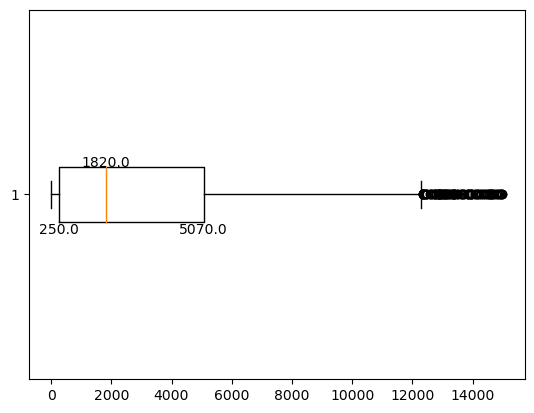

In [32]:
from pylab import *
bp_dict = boxplot(sales['MntMeat&Fish'], vert=False)

for line in bp_dict['medians']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    text(x, y, '%.1f' % x,
         horizontalalignment='center') # draw above, centered

for line in bp_dict['boxes']:
    x, y = line.get_xydata()[0] # bottom of left line
    text(x,y, '%.1f' % x,
         horizontalalignment='center', # centered
         verticalalignment='top')      # below
    x, y = line.get_xydata()[3] # bottom of right line
    text(x,y, '%.1f' % x,
         horizontalalignment='center', # centered
             verticalalignment='top')      # below


In [33]:
iqr= 

IndentationError: unexpected indent (302145801.py, line 2)

# Missing data 

In [122]:
sales.isna().sum()

CustomerID                0
Date_Adherence            0
Recency                  23
MntMeat&Fish              0
MntEntries                0
MntVegan&Vegetarian       0
MntDrinks                28
MntDesserts               0
MntAdditionalRequests     0
NumOfferPurchases         0
NumAppPurchases           0
NumTakeAwayPurchases      0
NumStorePurchases         0
NumAppVisitsMonth         0
Complain                  0
dtype: int64

In [43]:
#Impute MntDrinks

import pandas as pd
sales_products = sales[['MntDrinks','MntDesserts','MntEntries','MntVegan&Vegetarian']] # we are using this variables to impute in drinks because they have a corr>0.7

imputer = KNNImputer(n_neighbors=1)
array_impute = imputer.fit_transform(sales_products) # this is an array
sales_products = pd.DataFrame(array_impute, columns = sales_products.columns)

In [44]:
sales['MntDrinks'] = sales_products['MntDrinks'].values
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 11054 to 25310
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date_Adherence         7000 non-null   object 
 1   Recency                6977 non-null   float64
 2   MntMeat&Fish           7000 non-null   float64
 3   MntEntries             7000 non-null   int64  
 4   MntVegan&Vegetarian    7000 non-null   float64
 5   MntDrinks              7000 non-null   float64
 6   MntDesserts            7000 non-null   float64
 7   MntAdditionalRequests  7000 non-null   float64
 8   NumOfferPurchases      7000 non-null   int64  
 9   NumAppPurchases        7000 non-null   int64  
 10  NumTakeAwayPurchases   7000 non-null   int64  
 11  NumStorePurchases      7000 non-null   int64  
 12  NumAppVisitsMonth      7000 non-null   int64  
 13  Complain               7000 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.

In [45]:
sales.isna().sum()

Date_Adherence            0
Recency                  23
MntMeat&Fish              0
MntEntries                0
MntVegan&Vegetarian       0
MntDrinks                 0
MntDesserts               0
MntAdditionalRequests     0
NumOfferPurchases         0
NumAppPurchases           0
NumTakeAwayPurchases      0
NumStorePurchases         0
NumAppVisitsMonth         0
Complain                  0
dtype: int64

In [50]:
count=(sales['Recency']==0).sum()
count

65

In [52]:
sales.loc[sales[['Recency']].isna()]

KeyError: "None of [Int64Index([23], dtype='int64', name='CustomerID')] are in the [index]"